### Centaurus A
[TeVCat Gamma-Ray Source Summary](http://tevcat.uchicago.edu/?mode=1;id=122)</br>

[NASA/IPAC Extragalactic Database](https://ned.ipac.caltech.edu/byname?objname=Centaurus+A&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1)

### NGC 1275
http://tevcat.uchicago.edu/?mode=1;id=212</br>

https://ned.ipac.caltech.edu/byname?objname=NGC+1275&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1

In [23]:
# from .core import 

import matplotlib.pyplot as plt # A collection of command style functions

import numpy as np

from astropy import units as u
from astropy.units import  Quantity
from astropy.table import Table, Column
from astropy.coordinates import SkyCoord

from feupy.utils.string_handling import name_to_txt
from feupy.utils.units import Jy_to_erg_by_cm2_s
from feupy.catalog import CATALOG_REGISTRY
from feupy.analysis.config_cntr import CounterpartsConfig
from feupy.analysis.core_cntr import Counterparts

from feupy.plotters import generate_marker_set
from feupy.target import Target
from feupy.roi import ROI
from feupy.utils.table import write_tables_csv

from gammapy.utils.scripts import make_path

from gammapy.modeling.models import Models, LogParabolaSpectralModel, SkyModel
from gammapy.modeling import Fit

In [24]:
from feupy.scripts.ipynb_to_gallery import convert_ipynb_to_gallery 

In [49]:
%matplotlib inline

In [50]:
import matplotlib.pyplot as plt # A collection of command style functions

In [51]:
from astropy import units as u
from astropy.units import  Quantity
from astropy.coordinates import SkyCoord
from astropy.table import Table

from gammapy.utils.scripts import make_path
from gammapy.datasets import Datasets, FluxPointsDataset

from gammapy.estimators import FluxPoints
from gammapy.modeling.models import Models, LogParabolaSpectralModel, SkyModel
from gammapy.modeling import Fit

from feupy.utils.string_handling import name_to_txt
from feupy.catalog import CATALOG_REGISTRY
from feupy.analysis.config_cntr import CounterpartsConfig
from feupy.analysis.core_cntr import Counterparts
from feupy.plotters import generate_marker_set
from feupy.target import Target
from feupy.roi import ROI

from core import get_data_VizieR_byname

In [52]:
source_name = 'NGC 1275'
name_file = name_to_txt(source_name)
position = SkyCoord.from_name(source_name)

In [53]:
outdir = f"./{name_file}"
outdir_path = make_path(outdir)
outdir_path.mkdir(parents=True, exist_ok=True)

datasets_path = make_path(f"{outdir_path}/datasets/")
datasets_path.mkdir(parents=True, exist_ok=True)

figures_path = make_path(f"{outdir_path}/figures/")
figures_path.mkdir(parents=True, exist_ok=True)

data_path = make_path(f"./data/{outdir}")
data_path.mkdir(parents=True, exist_ok=True)

In [54]:
config = CounterpartsConfig()

config.general.outdir = outdir
config.general.datasets_file = f"{datasets_path}/datasets.yaml"
config.general.models_file = f"{datasets_path}/models.yaml"

In [55]:
# catalog = CATALOG_REGISTRY.get_cls("gamma-cat")()
# source = catalog[source_name]
# print(source.info())

In [61]:
file = f'{data_path}/table_photandseds.csv'
table = Table.read(file)
table

No.,Observed Passband,Photometry Measurement,Uncertainty,Units,Frequency,Flux Density,Upper limit of uncertainty,Lower limit of uncertainty,Upper limit of Flux Density,Lower limit of Flux Density,NED Uncertainty,NED Units,Refcode,Significance,Published frequency,Frequency Mode,Coordinates Targeted,Spatial Mode,Qualifiers,Comments
int64,str20,float64,str13,str20,float64,float64,float64,float64,float64,int64,str11,str2,str19,str23,str18,str64,str37,str57,str40,str163
1,50 GeV-2 TeV (Fermi),8.06e-12,+/-2.72E-12,erg/cm^2^/s,2.48e+26,3.25e-15,1.1e-15,1.1e-15,--,--,+/-1.10E-15,Jy,2016ApJS..222....5A,1 sigma,1.025 TeV,Broad-band measurement,049.9670 +41.5219 (J2000),Flux integrated from map,--,From new raw data; NED frequency assigned to mid-point ofband in keV
2,0.01-1 TeV (Fermi),4.8e-11,+/-3.16E-12,erg/cm^2^/s,1.22e+26,3.93e-14,2.59e-15,2.59e-15,--,--,+/-2.59E-15,Jy,2017ApJS..232...18A,1 sigma,0.51 TeV,Broad-band measurement,049.959995 +41.512283 (J2000),From fitting to map,--,From reprocessed raw data; NED frequency assigned tomid-point of band in keV
3,400 GeV (Whipple),--,<0.29E-11,erg cm^-2^ s^-1^,9.67e+25,--,--,--,3e-15,--,<3.00E-15,Jy,2006ApJ...644..148P,90% confidence,400 GeV,Broad-band measurement,03 19 48 +41 30 42 (J2000),Flux integrated from map,--,From new raw data
4,100 MeV-100 GeV LAT,1.741e-10,+/-8.1E-12,erg/s/cm^2^,1.21e+25,1.44e-12,6.69e-14,6.69e-14,--,--,+/-6.69E-14,Jy,2010ApJS..188..405A,uncertainty,50050 MeV,Broad-band measurement,049.941 +41.508 (J2000),From fitting to map,--,From new raw data; NED frequency assigned to mid-point ofband in keV
5,0.1-100 GeV (Fermi),1.737e-10,+/-6.2E-12,erg/cm^2^/s,1.21e+25,1.44e-12,5.12e-14,5.12e-14,--,--,+/-5.12E-14,Jy,2012ApJS..199...31N,1 sigma,50.05 GeV,Broad-band measurement,049.965 +41.513 (J2000),Modelled datum,Variable,From new raw data; NED frequency assigned to mid-point ofband in keV
6,0.1-100 GeV (Fermi),1.991e-10,+/-3.9E-12,erg/cm^2^/s,1.21e+25,1.65e-12,3.22e-23,3.22e-23,--,--,+/-3.22E-23,Jy,2015ApJS..218...23A,1 sigma,50.05 GeV,Broad-band measurement,049.959 +41.514 (J2000),From fitting to map,Variable; Gamma=2.08; Mod=LP,From new raw data; NED frequency assigned to mid-point ofband in keV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,16.7 MHz (UTR-1),1.55e-23,+/-14 %,W m^-2^ Hz^-1^,16700000.0,1550.0,217.0,217.0,--,--,+/-2.17E+02,Jy,1969MNRAS.143..289B,uncertainty,16.7 MHz,Broad-band measurement,03 16 28.6 +41 19.8 (B1950),Total flux,--,From new raw data
652,16.7 MHz,1550.0,+/-14 %,Jy,16700000.0,1550.0,217.0,217.0,--,--,+/-2.17E+02,Jy,1969MNRAS.143..289B,estimated error,16.7 MHz,Broad-band measurement,--,Total flux,--,From new raw data


In [57]:
file = f'{data_path}/table_qlphot.csv'
table = Table.read(file)
table

<Table length=0>
<No columns>

In [58]:
columns = ['Spectral Region',
 'Band',
 'Apparent Mag or Flux',
 'Reference code',
 'Absolute Mag or νLν [W]',
 'νLν [L☉(Bolometric)]']

In [59]:
table_ =  table[columns]
table_

KeyError: 'Spectral Region'

In [ ]:
write_tables_csv(table_, path_file=data_path, file_name= 'table_qlphot_')

In [ ]:
file = f'{data_path}/table_qlphot_.csv'
table_ = Table.read(file)
table_

In [ ]:
!pip install pylatex

In [48]:


import csv
def csv_to_latex(csv_file):
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        headers = next(reader)
        latex_table = "\\begin{tabular}{lcr}\n" + " & ".join(headers) + " \\\\\n\\hline\n"
        for row in reader:
            latex_table += " & ".join(row) + " \\\\\n"
        latex_table += "\\end{tabular}"
    return latex_table

table = 
print(csv_to_latex(f'{data_path}/table_qlphot.csv'))

SyntaxError: invalid syntax (1560828565.py, line 12)

In [62]:
datasets_VizieR = get_data_VizieR_byname(table)

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point 

In [63]:
datasets = Datasets(datasets_VizieR)

In [64]:
xaxis_label = r'$\rm{E\ [TeV] }$'
xaxis_units = u.Unit('TeV')

yaxis_label = r'$\rm{E^2\ J(E)\ [erg\ cm^{-2}\ s^{-1}] }$'
yaxis_units = u.Unit('erg cm-2 s-1')

energy_bounds = [1e-22, 1e3] * u.TeV
ylim = [1e-16, 1e-8]

leg_place = dict(
    bbox_to_anchor = (1, 0.5), # Set legend outside plot
    ncol=1, 
#     loc='upper left', 
)
markers = generate_marker_set(datasets.names, 5)

97 unique markers generated


In [65]:
markers

{'label': ['2016ApJS..222....5A',
  '2017ApJS..232...18A',
  '2006ApJ...644..148P',
  '2010ApJS..188..405A',
  '2010ApJS..186..378T',
  '2010A&A...524A..64C',
  '2017ApJS..233...17R',
  '2006ApJ...638..642B',
  '2009MNRAS.399..944M',
  '2018ApJS..238...32K',
  '2017MNRAS.471.2952M',
  '2004ApJ...617..915D',
  '2020CSC...C2..0000:',
  '2006A&A...451...35B',
  '2007A&A...476..759B',
  '2012ApJS..199...23H',
  '2014ApJS..212...18B',
  '2015ApJS..220....6B',
  '1970ApJ...162..743A',
  '2011ApJ...739...57K',
  '1983ApJS...52..341M',
  '1968CGCG6.C...0000Z',
  '2007ApJS..170...33P',
  '2008A&A...486..755T',
  '1977Obs....97..238G',
  '1980Nat...284..410L',
  '2004A&A...419...25F',
  '2003AJ....125..525J',
  '1968AJ.....73..866W',
  '1985MNRAS.214..109L',
  '2006AJ....131.1163S',
  '20032MASX.C.......:',
  '1974MNRAS.169..357P',
  '1982ApJ...257..570R',
  '2013wise.rept....1C',
  '2014MNRAS.438.1149G',
  '1977ApJ...215L.107K',
  '1976ApJ...205...44S',
  '2010MNRAS.408.1982L',
  '1978ApJ...226

In [66]:
markers

{'label': ['2016ApJS..222....5A',
  '2017ApJS..232...18A',
  '2006ApJ...644..148P',
  '2010ApJS..188..405A',
  '2010ApJS..186..378T',
  '2010A&A...524A..64C',
  '2017ApJS..233...17R',
  '2006ApJ...638..642B',
  '2009MNRAS.399..944M',
  '2018ApJS..238...32K',
  '2017MNRAS.471.2952M',
  '2004ApJ...617..915D',
  '2020CSC...C2..0000:',
  '2006A&A...451...35B',
  '2007A&A...476..759B',
  '2012ApJS..199...23H',
  '2014ApJS..212...18B',
  '2015ApJS..220....6B',
  '1970ApJ...162..743A',
  '2011ApJ...739...57K',
  '1983ApJS...52..341M',
  '1968CGCG6.C...0000Z',
  '2007ApJS..170...33P',
  '2008A&A...486..755T',
  '1977Obs....97..238G',
  '1980Nat...284..410L',
  '2004A&A...419...25F',
  '2003AJ....125..525J',
  '1968AJ.....73..866W',
  '1985MNRAS.214..109L',
  '2006AJ....131.1163S',
  '20032MASX.C.......:',
  '1974MNRAS.169..357P',
  '1982ApJ...257..570R',
  '2013wise.rept....1C',
  '2014MNRAS.438.1149G',
  '1977ApJ...215L.107K',
  '1976ApJ...205...44S',
  '2010MNRAS.408.1982L',
  '1978ApJ...226

/tmp/ipykernel_301054/3329461671.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.savefig(f"{figures_path}/flux_points_VizieR_{name_file}")
/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


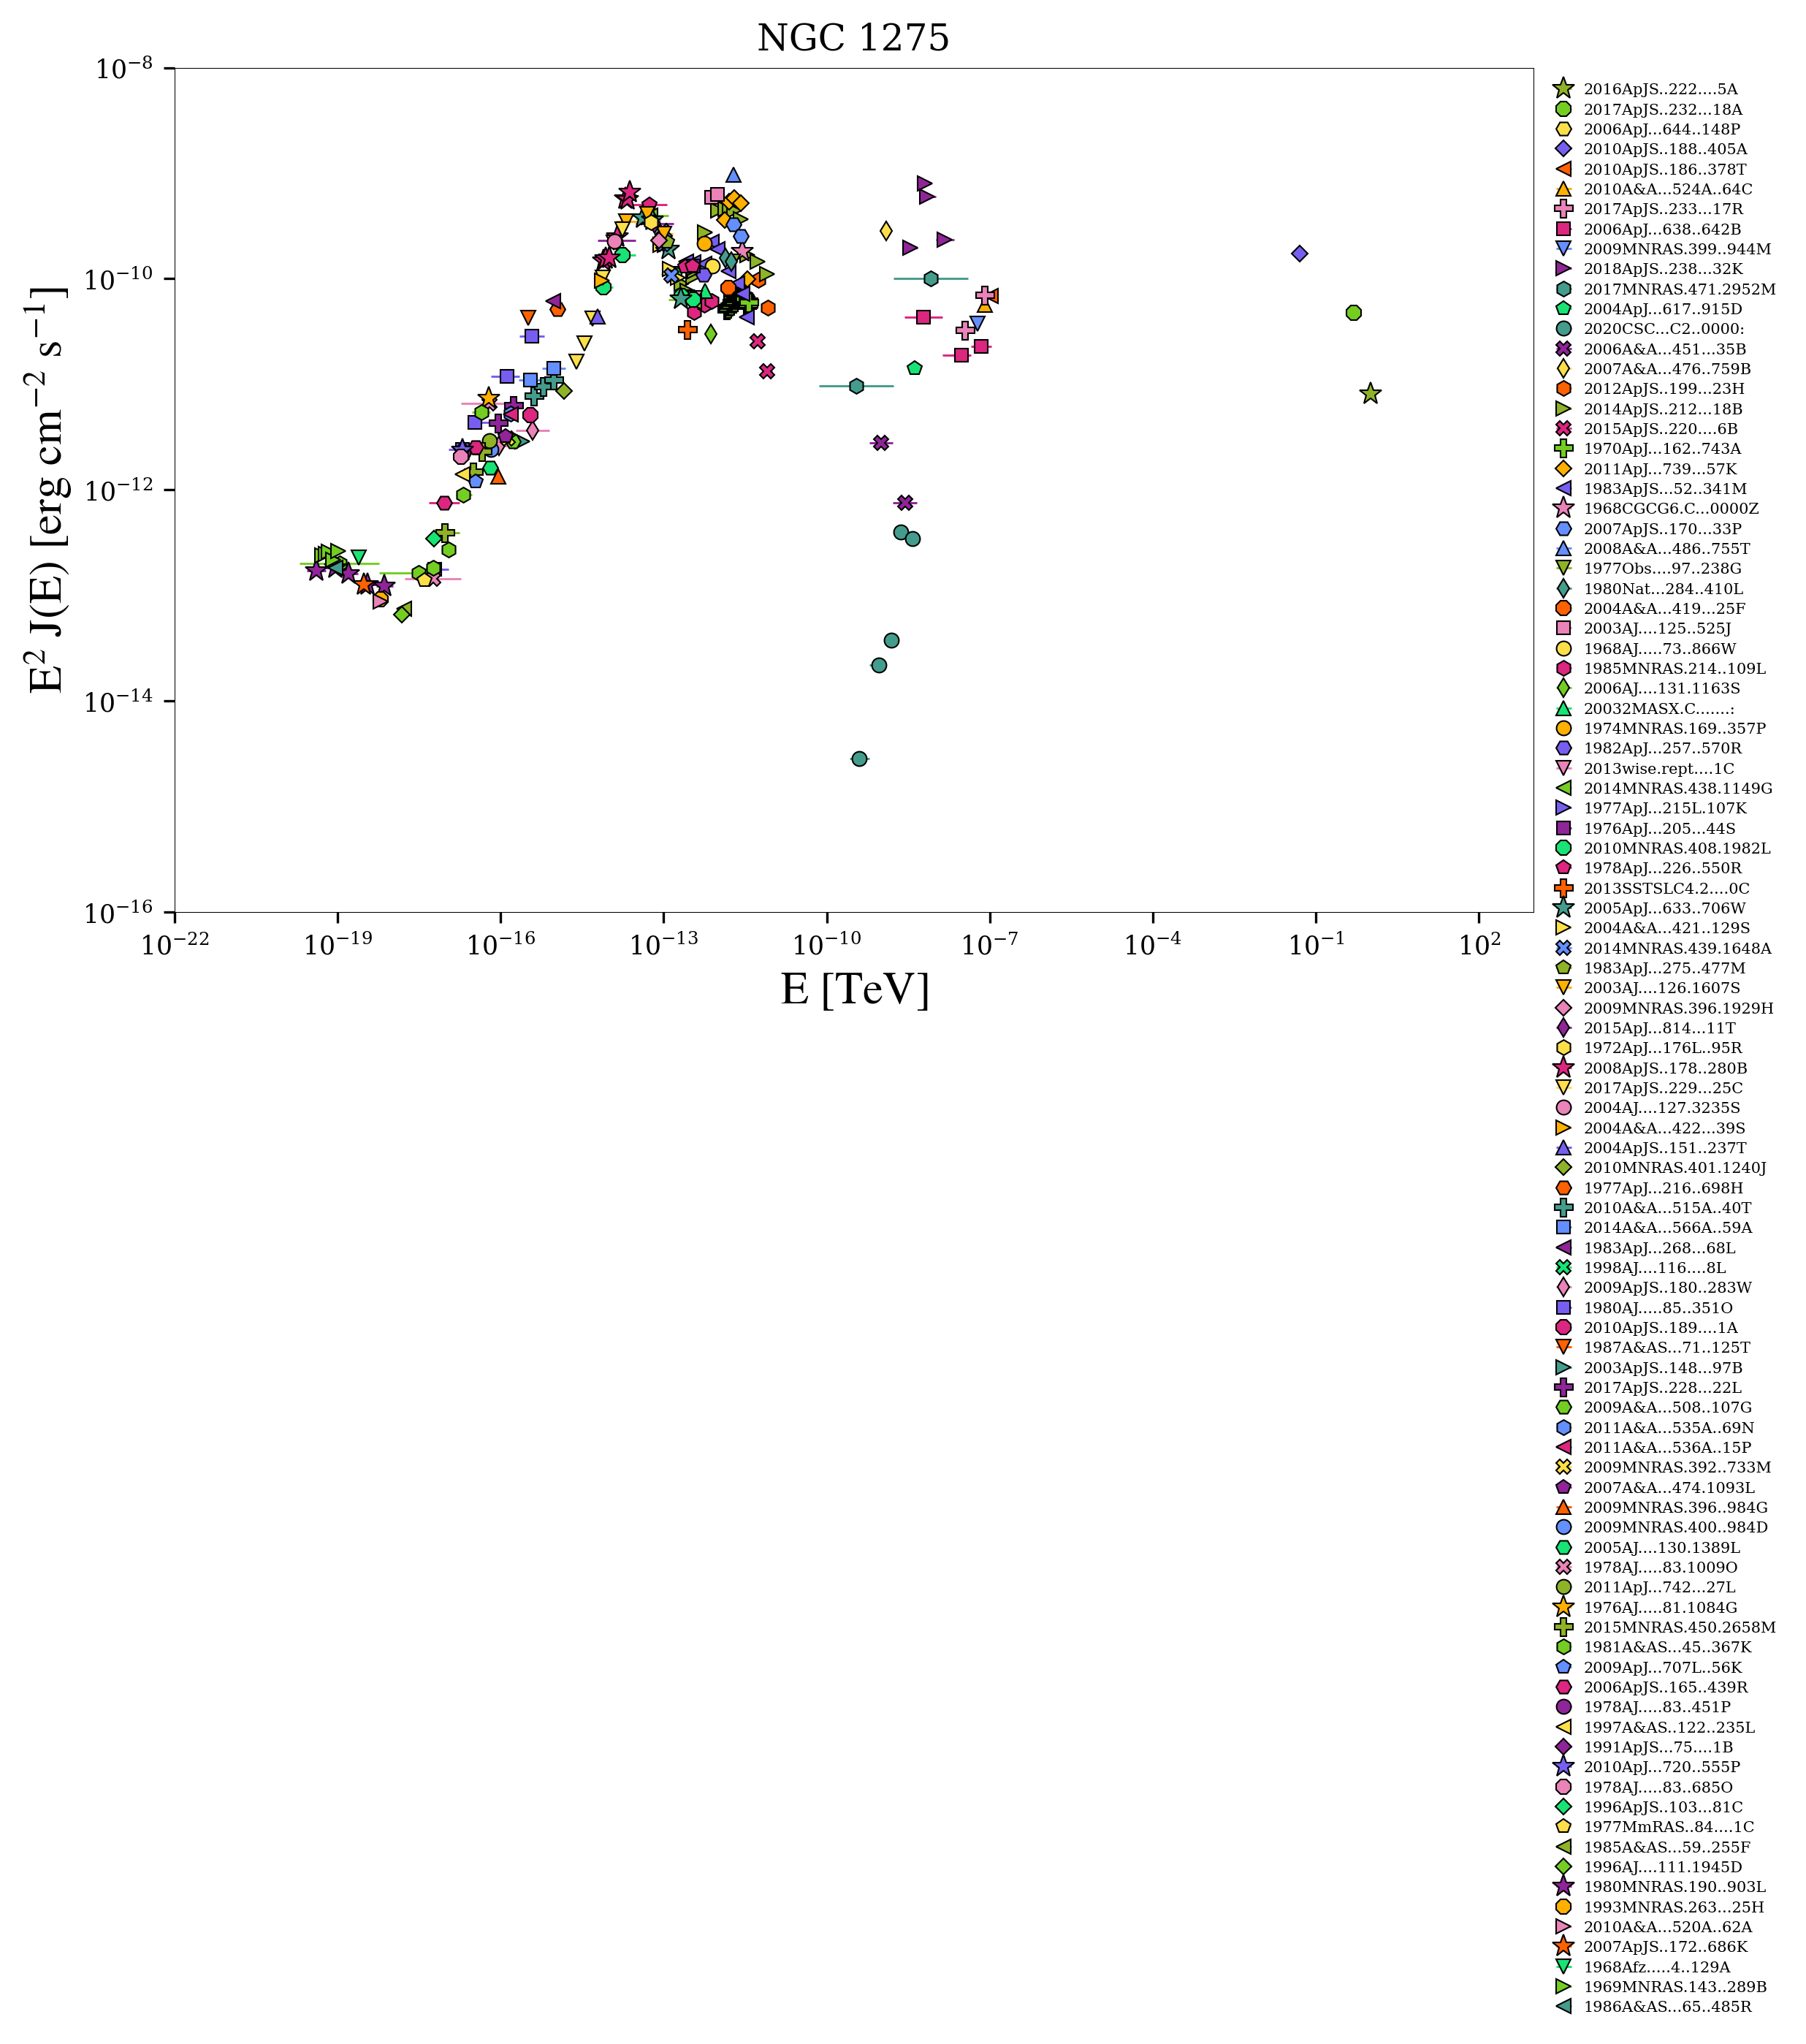

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

kwargs = {"ax": ax, "sed_type": "e2dnde"}

for index, d in enumerate(datasets):
    marker=markers['marker'][index] 
    label=markers['label'][index] 
    markersize=markers['markersize'][index] 
    color=markers['color'][index] 

    d.data.plot(
        label=d.name, 
        c=color,
        marker=marker,
        markersize=markersize,
        ls='None',
        mec='k',
        mew=0.5,
        elinewidth=0.7,
        capsize=1.5,
        **kwargs
    )
    
ax.yaxis.set_units(yaxis_units)
ax.xaxis.set_units(xaxis_units)

ax.set_xlabel(xaxis_label)
ax.set_ylabel(yaxis_label)

ax.set_xlim(energy_bounds)
ax.set_ylim(ylim)

ax.legend(loc='upper left', ncol=1, fontsize=5, bbox_to_anchor=(1,1))

plt.title(f"{source_name}")

plt.savefig(f"{figures_path}/flux_points_VizieR_{name_file}")
plt.show()


In [9]:
target = Target(
    name=source_name, 
    pos_ra=position.ra, 
    pos_dec=position.dec,
)

radius_roi = 0.25 * u.Unit("deg")

roi = ROI(target=target, radius=radius_roi)

config.roi = roi.dict
config.roi.catalogs = "all"

analysis = Counterparts(config)
analysis.run()


Setting logging config: {'level': 'INFO', 'filename': None, 'filemode': None, 'format': None, 'datefmt': None}


SourceCatalogGammaCat:
    name: gamma-cat
    description: An open catalog of gamma-ray sources
    sources: 162

SourceCatalogHGPS:
    name: hgps
    description: H.E.S.S. Galactic plane survey (HGPS) source catalog
    sources: 78

SourceCatalog2HWC:
    name: 2hwc
    description: 2HWC catalog from the HAWC observatory
    sources: 40

SourceCatalog3FGL:
    name: 3fgl
    description: LAT 4-year point source catalog
    sources: 3034

SourceCatalog4FGL:
    name: 4fgl
    description: LAT 8-year point source catalog
    sources: 6659

SourceCatalog2FHL:
    name: 2fhl
    description: LAT second high-energy source catalog
    sources: 360

SourceCatalog3FHL:
    name: 3fhl
    description: LAT third high-energy source catalog
    sources: 1556

SourceCatalog3HWC:
    name: 3hwc
    description: 3HWC catalog from the HAWC observatory
    sources: 65

SourceCatalogExtraHAWC:
    name: extraHAWC
    description: extraHAWC catalog from the HAWC observatory
    sources: 8

SourceCatal

In [10]:
analysis.df_sep

,Source name,RA(deg),dec.(deg),Sep.(deg)
0,3FGL J0319.8+4130,49.958599,41.513699,0.006268
1,4FGL J0319.8+4130,49.957500,41.512100,0.005133
2,2FHL J0319.8+4131,49.966999,41.521900,0.015927
3,3FHL J0319.8+4130,49.959995,41.512283,0.007010


In [11]:
# analysis.datasets.names

In [12]:
# analysis.write_datasets()
# analysis.write_models()

In [13]:
models = Models()
datasets = Datasets()

In [14]:
# path_dir = datasets_dir
# datasets_HE = Datasets.read(filename=f'{path_dir}/datasets.yaml', filename_models=f'{path_dir}/models.yaml')

datasets_HE = analysis.datasets.copy()
models.extend(datasets_HE.models)
datasets.extend(datasets_HE.copy())

In [15]:
xaxis_label = r'$\rm{E\ [MeV] }$'
xaxis_units = u.Unit('MeV')

yaxis_label = r'$\rm{E^2\ J(E)\ [erg\ cm^{-2}\ s^{-1}] }$'
yaxis_units = u.Unit('erg cm-2 s-1')

energy_bounds = [1e1, 1e7] * u.MeV
ylim = [1e-15, 1e-8]

leg_place = dict(
    bbox_to_anchor = (1, 0.5), # Set legend outside plot
    ncol=1, 
#     loc='upper left', 
)
markers = generate_marker_set(datasets.names, 5)

4 unique markers generated


In [16]:
spectral_model = datasets_HE.models[1].spectral_model

model_fit = SkyModel(
#     spatial_model=spatial_model,
    spectral_model=spectral_model,
    name="model-fit",
)
models.append(model_fit)
display(model_fit.parameters.to_table())

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
spectral,amplitude,4.7113e-11,MeV-1 s-1 cm-2,3.947e-13,nan,nan,False,True,
spectral,reference,9.1798e+02,MeV,0.000e+00,nan,nan,True,False,
spectral,alpha,2.0492e+00,,6.619e-03,nan,nan,False,False,
spectral,beta,6.8538e-02,,3.523e-03,nan,nan,False,False,


In [17]:
display(model_fit.parameters.to_table())

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
spectral,amplitude,4.7113e-11,MeV-1 s-1 cm-2,3.947e-13,nan,nan,False,True,
spectral,reference,9.1798e+02,MeV,0.000e+00,nan,nan,True,False,
spectral,alpha,2.0492e+00,,6.619e-03,nan,nan,False,False,
spectral,beta,6.8538e-02,,3.523e-03,nan,nan,False,False,


In [18]:
datasets.models = model_fit
fitter = Fit()
result_fit = fitter.run(datasets=datasets)
display(model_fit.parameters.to_table())

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
spectral,amplitude,3.8931e-11,MeV-1 s-1 cm-2,2.933e-13,nan,nan,False,True,
spectral,reference,9.1798e+02,MeV,0.000e+00,nan,nan,True,False,
spectral,alpha,1.9613e+00,,7.311e-03,nan,nan,False,False,
spectral,beta,9.6899e-02,,2.859e-03,nan,nan,False,False,


In [19]:
result_fit.success

True

In [20]:
datasets.names

['3FGL J0319.8+4130',
 '4FGL J0319.8+4130',
 '2FHL J0319.8+4131',
 '3FHL J0319.8+4130']

In [21]:
energy_bounds = [1e1, 1e7] * u.MeV
ylim = [1e-15, 1e-8]

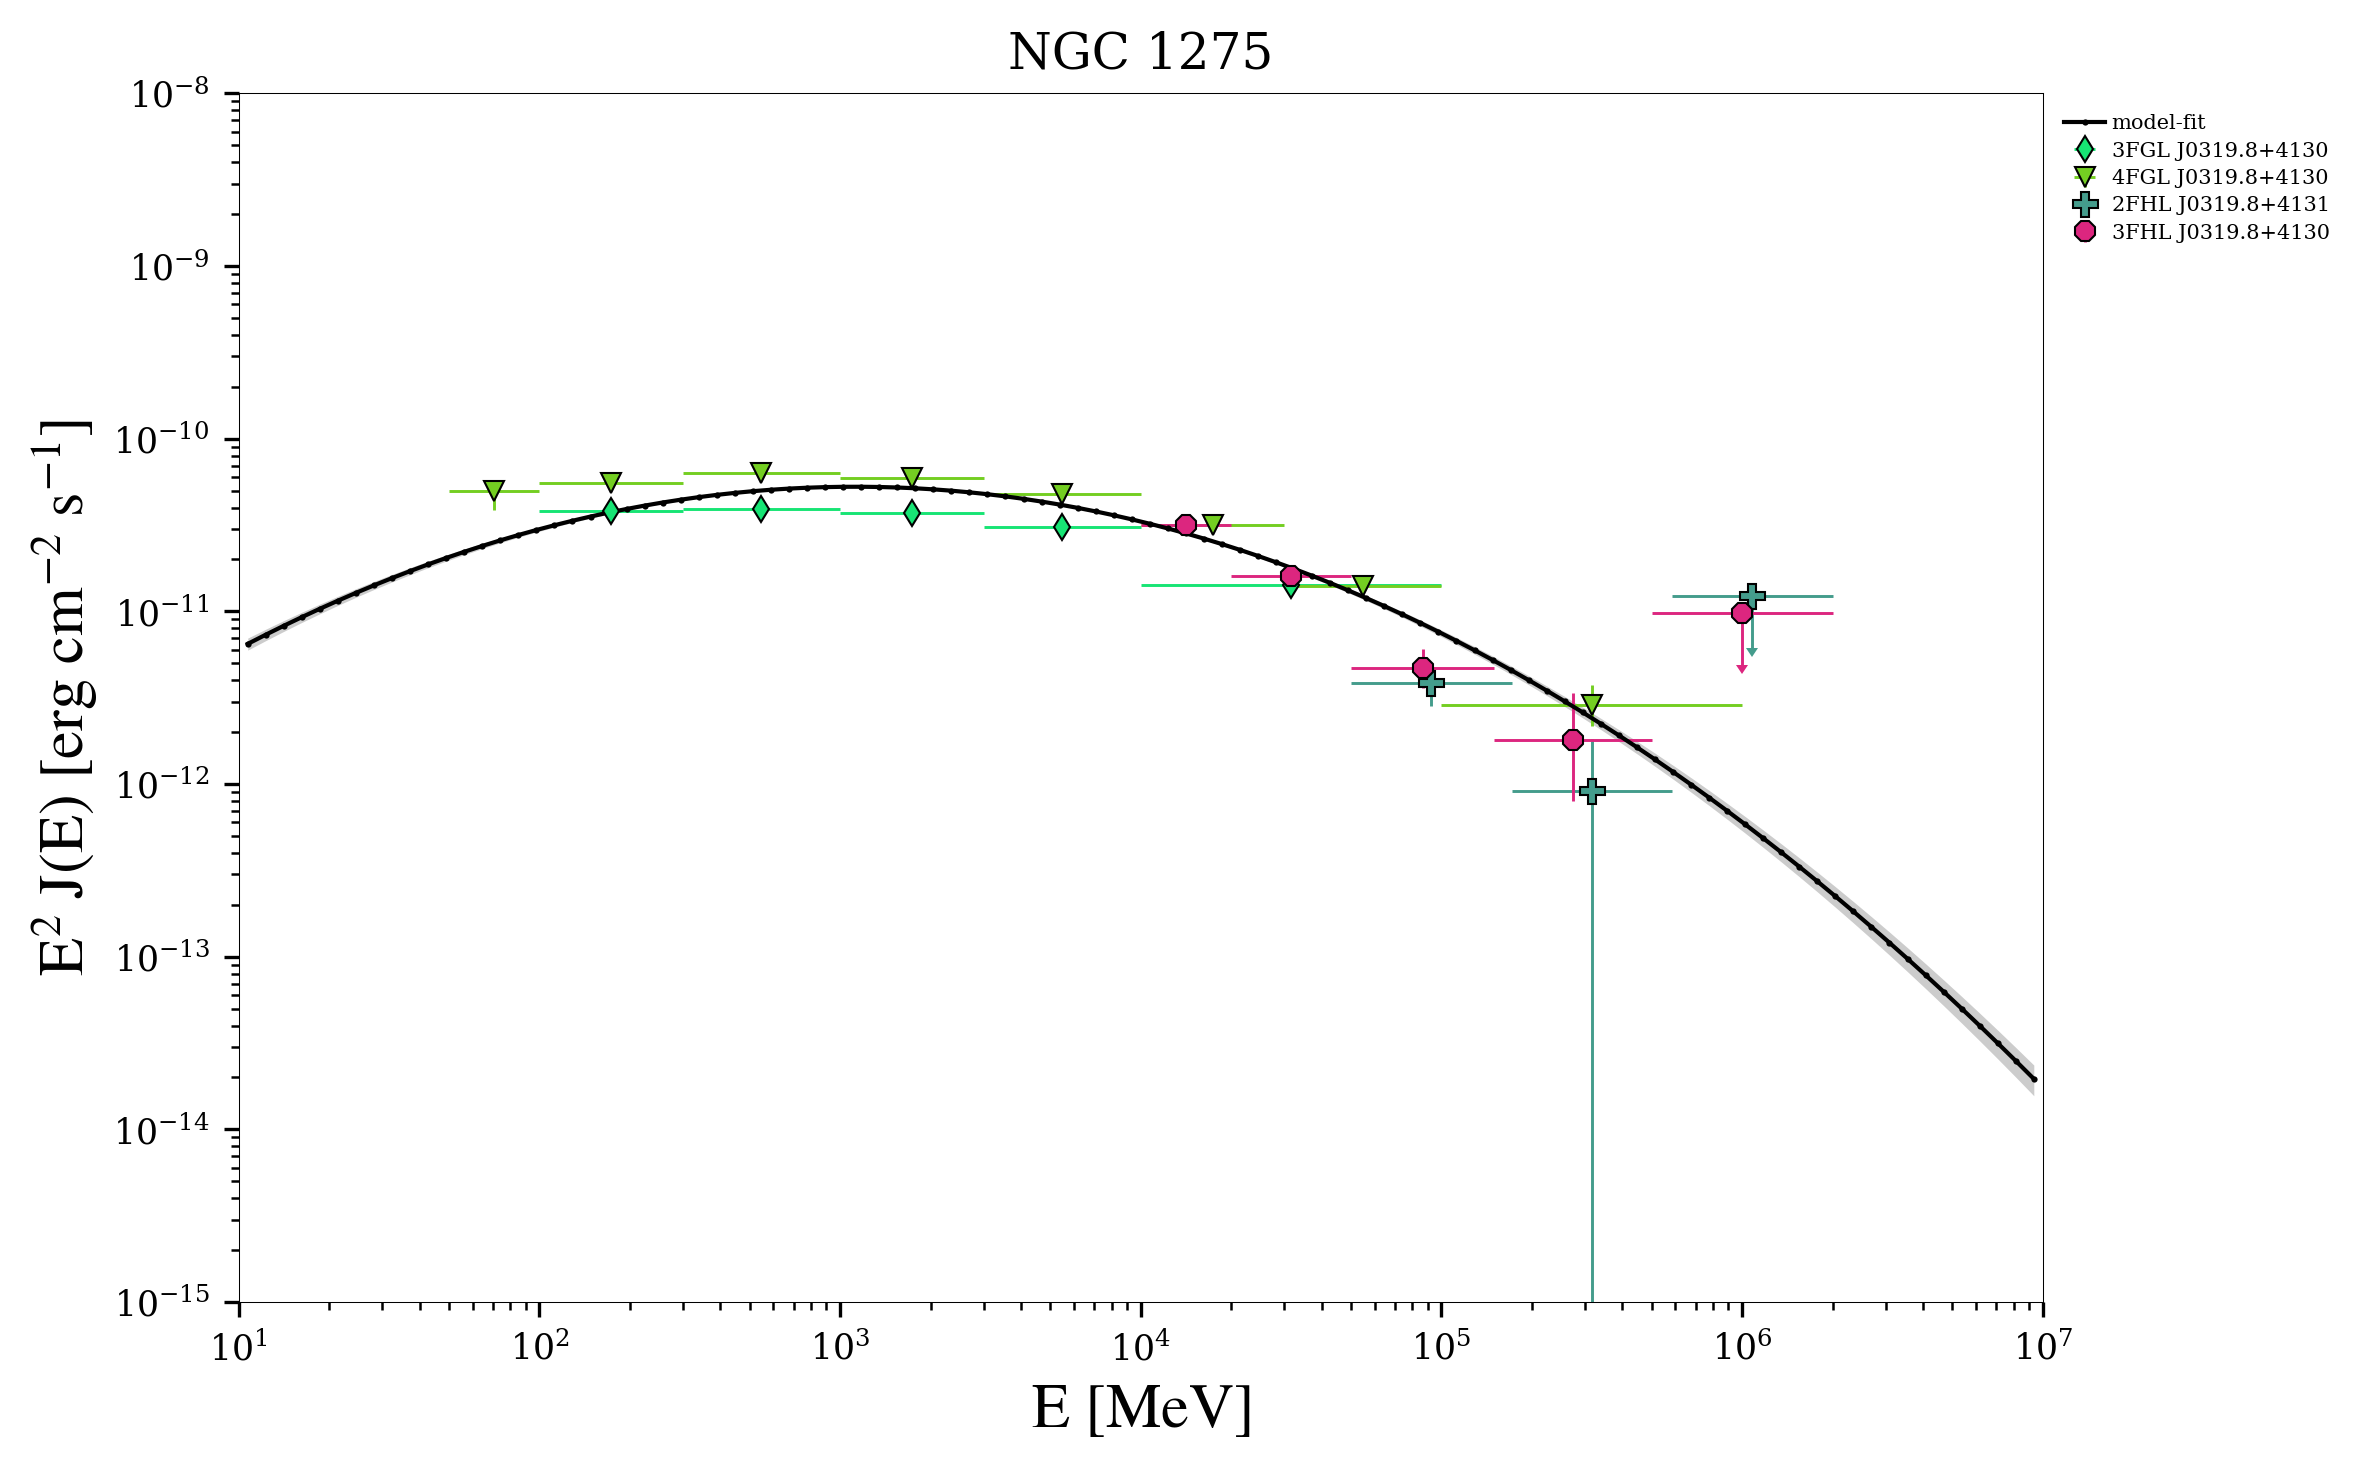

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

kwargs = {"ax": ax, "sed_type": "e2dnde"}

for index, d in enumerate(datasets):
    marker=markers['marker'][index] 
    label=markers['label'][index] 
    markersize=markers['markersize'][index] 
    color=markers['color'][index] 

    d.data.plot(
        label=d.name, 
        c=color,
        marker=marker,
        markersize=markersize,
        ls='None',
        mec='k',
        mew=0.5,
        elinewidth=0.7,
        capsize=1.5,
        **kwargs
    )
    
model_fit.spectral_model.plot(energy_bounds=energy_bounds, label=model_fit.name, color="k", **kwargs)
model_fit.spectral_model.plot_error(energy_bounds=energy_bounds, **kwargs)
ax.yaxis.set_units(yaxis_units)
ax.xaxis.set_units(xaxis_units)

ax.set_xlabel(xaxis_label)
ax.set_ylabel(yaxis_label)

ax.set_xlim(energy_bounds)
ax.set_ylim(ylim)

ax.legend(loc='upper left', ncol=1, fontsize=5, bbox_to_anchor=(1,1))

plt.title(f"{source_name}")

plt.savefig(f"{figures_path}/SED_HE_{name_file}")
plt.show()


In [29]:
analysis.datasets.models = models

In [30]:
datasets.models = models

In [31]:
datasets.extend(datasets_VizieR)
analysis.datasets = datasets

NameError: name 'datasets_VizieR' is not defined

In [ ]:
display(models['model-fit'].parameters.to_table())

In [ ]:
display(datasets.models['model-fit'].parameters.to_table())

In [ ]:
datasets.models[0]

In [ ]:
datasets.write()

In [ ]:
config.write(path=f'{outdir}/config.yaml', overwrite=True)

In [ ]:
# config.read(config.general.config_file)

In [32]:
datasets.write(filename=config.general.datasets_file, filename_models=config.general.models_file, overwrite=True)

In [ ]:
!jupyter nbconvert counterparts.ipynb  --to notebook --output 'counterparts_{source_name}' --output-dir '.'

In [ ]:
convert_ipynb_to_gallery('counterparts.ipynb', output_file_name=f'{outdir}/counterparts_{source_name}')